In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [124]:
bins = [0, 1, 4, 9, 13, 18, 35, 55, np.inf]
labels = ['baby', 'toddler', 'gradeschool', 'preteen', 'teenager', 'youngadult', 'middle-aged', 'elder']
patient_headers = ['PatientId']
cats = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'no', 'yes']

data = (pd.read_csv('noshowappointments-kagglev2-may-2016.csv', dtype={'PatientId': object, 'AppointmentID': object})
            .query("Age >= 0")
            .drop_duplicates(subset=['PatientId', 'AppointmentDay'], keep=False)
            .assign(ScheduledDay=lambda x: pd.to_datetime(pd.to_datetime(x['ScheduledDay']).dt.date),
                    AppointmentDay=lambda x: pd.to_datetime(x['AppointmentDay']),
                    age_group=lambda x: pd.cut(x['Age'], bins, labels=labels, include_lowest=True),
                    yes=lambda x: (x['No-show'] == 'Yes').astype(int),
                    no=lambda x: (x['No-show'] == 'No').astype(int)))

data.age_group.cat.reorder_categories(labels, inplace=True)

def 

def noshow_counts(df, columns):
    df = df.copy()
    return df.groupby(columns)['No-show'].value_counts().unstack(1).reset_index()

def get_noshow_ratio(df):
    return df['Yes']/(df['No']+df['Yes'])

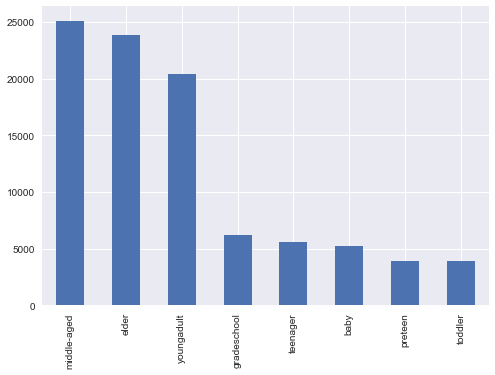

In [125]:
data['age_group'].value_counts().plot.bar()

In [126]:
age_groups = data.groupby('age_group')
age_groups['Alcoholism'].sum()

age_group
baby              0
toddler           1
gradeschool       4
preteen           5
teenager         11
youngadult      354
middle-aged    1224
elder           832
Name: Alcoholism, dtype: int64

In [ ]:
data[data[['PatientId', 'AppointmentDay']].duplicated

In [ ]:
data[data[['PatientId', 'AppointmentDay']].duplicated

## Things to do

1. Column DataType Changes
    - PatientId = Object (or a ID type if pandas has that)
    - Scholarship = Category
    - Hipertension = Category
    - Diabetes = Category
    - Alcoholism = Category
    - Handicap = Category
    - SMS_received = Category
    - No_Shows = Category
    
2. Remove outliers
    - a -1.00 age needs to be removed. 0 age may refer to babies, so that may stay the same.
    
3. Visualizations
    - Bar chart of major categories (Scholarship, Hipertension, Diabetes, Alcoholism, and Handcap)

In [ ]:
data.info()

In [ ]:
major_cats_alt = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
major_cats_alt_no_show = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
no_shows = data[data['No-show'] == 'Yes']
no_shows.mean(numeric_only=True)

In [ ]:
shows = data[data['No-show'] == 'No']
shows.std(numeric_only=True)

In [ ]:
age_comparison = data[['Age', 'No-show']]
age_comparison.info()

In [ ]:
bins = [0, 1, 4, 9, 13, 18, 35, 55, np.inf]
labels = ['baby', 'toddler', 'gradeschool', 'preteen', 'teenager', 'youngadult', 'middle-aged', 'elder']
data['age_groups'] = pd.cut(data['Age'], bins, labels=labels, include_lowest=True)

age_comparison = (data.pipe(noshow_counts, ['age_groups'])
                      .set_index('age_groups')
                      .fillna(0)
                      .assign(noshow_ratio=get_noshow_ratio))

age_comparison.plot.bar()

In [ ]:
data[major_cats_alt_no_show].groupby('No-show').sum().T.plot.bar()

In [ ]:
data[major_cats_alt].filter?

In [ ]:
no_select = data.copy()
no_select['No-selection'] = data.filter(major_cats_alt).eq(0).all(1)
no_select

In [ ]:
selections = data.copy()
selections['Selections'] = data[major_cats_alt].sum(axis=1)
selections = selections.groupby('Selections')['No-show'].value_counts().unstack(1)
selections.apply(lambda x: x/selections.sum().sum())

In [ ]:
data['PatientId'].value_counts().max()

In [ ]:
patient_counts = data.copy()
patient_counts['freq'] = data.groupby('PatientId')['PatientId'].transform('count')
patient_counts = patient_counts.groupby('freq')['No-show'].value_counts().unstack(1).reset_index().fillna(0)
patient_counts['Patients'] = patient_counts.apply(lambda x: (x['No']+x['Yes'])/x['freq'], axis=1)
patient_counts['% of Missed'] = patient_counts['Yes']/(patient_counts['No']+patient_counts['Yes'])
patient_counts.plot.scatter(x='freq', y='% of Missed', marker='o', c='b')

In [ ]:
sns.lmplot(x='freq', y='% of Missed', data=patient_counts)

In [ ]:
gender = data.groupby('Gender')['No-show'].value_counts().unstack(1)
gender

In [ ]:
neighbourhoods = data.groupby('Neighbourhood')['No-show'].value_counts().unstack(1)
neighbourhoods['% of Missed'] = neighbourhoods['Yes']/(neighbourhoods['No']+neighbourhoods['Yes'])
neighbourhoods['total'] = neighbourhoods.iloc[:, :2].sum(axis=1)
neighbourhoods.sort_values('% of Missed', ascending=False)

In [ ]:
data.info()

In [ ]:
test = data.copy()
test['ScheduledDay'] = pd.to_datetime(pd.to_datetime(test['ScheduledDay']).dt.date)
test['AppointmentDay'] = pd.to_datetime(test['AppointmentDay'])
test['days_left'] = test['AppointmentDay'] - test['ScheduledDay']
test = test.groupby('days_left')['No-show'].value_counts().unstack(1).fillna(0).reset_index()
test = test.query('days_left >= "0 days"')
q = pd.cut(test.days_left, 15)
new = test.groupby(q).sum()
new['%'] = new['Yes']/(new['No']+new['Yes'])
new

In [ ]:
data.groupby('No-show')['No-show'].transform('value_counts')